#### Summary: We assume that the explained variance might be a factor influence the correctness of the PC1-based compartment analysis. 

1. If we can't see any regular pattern showing in the visualization of Pearson matrix, the explained variance of PC1 will in hence be very low, and the PC1 is of-course useless for identifying the compartment pattern.
2. Since the Hi-C Pearson matrix will usually shows the well separated plaid-pattern, the result explained variance of PC1 will be high enough for the compartment analysis. However, if we find out the explained variance of PC1 for the Hi-C Pearson matrix is quite low, it might become a caveat to consider whether the PC1 is suitable for identifying the compartment pattern.   

In [8]:
from hicpap import paptools
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

np.set_printoptions(suppress=True)
np.set_printoptions(precision=5)
np.set_printoptions(threshold=10)
np.random.seed(3)

In [9]:
data_store="/media/jordan990301/Samsung_T5/HiC_Datasets/data_for_hicpap/data_store"

In [10]:
def generate_pearson(n:int):
    # Create a nxn array with random positive values
    matrix_np = np.abs(np.random.randn(n, n) * 10)  # Use absolute values for positive entries
    # Make the array symmetric
    matrix_np = matrix_np + matrix_np.T

    pearson_np = np.corrcoef(matrix_np)
    # Subtract the mean of each row to center the data
    return pearson_np 

pearson_np = generate_pearson(n=250)

Calculate PC1

In [11]:
Vh, explained_variances, total_entry_num, valid_entry_num = paptools.pca_on_pearson(pearson_np=pearson_np)
pc1_np = Vh[0]
print(f"Length of pc1_np: {len(pc1_np)}")
print(f"pc1_np: {pc1_np}")
print(f"pc1 explained_variance: {explained_variances[0]}")

Length of pc1_np: 250
pc1_np: [ 0.06063 -0.0888   0.03239 ... -0.07094  0.07062 -0.01218]
pc1 explained_variance: 0.02875889141283014


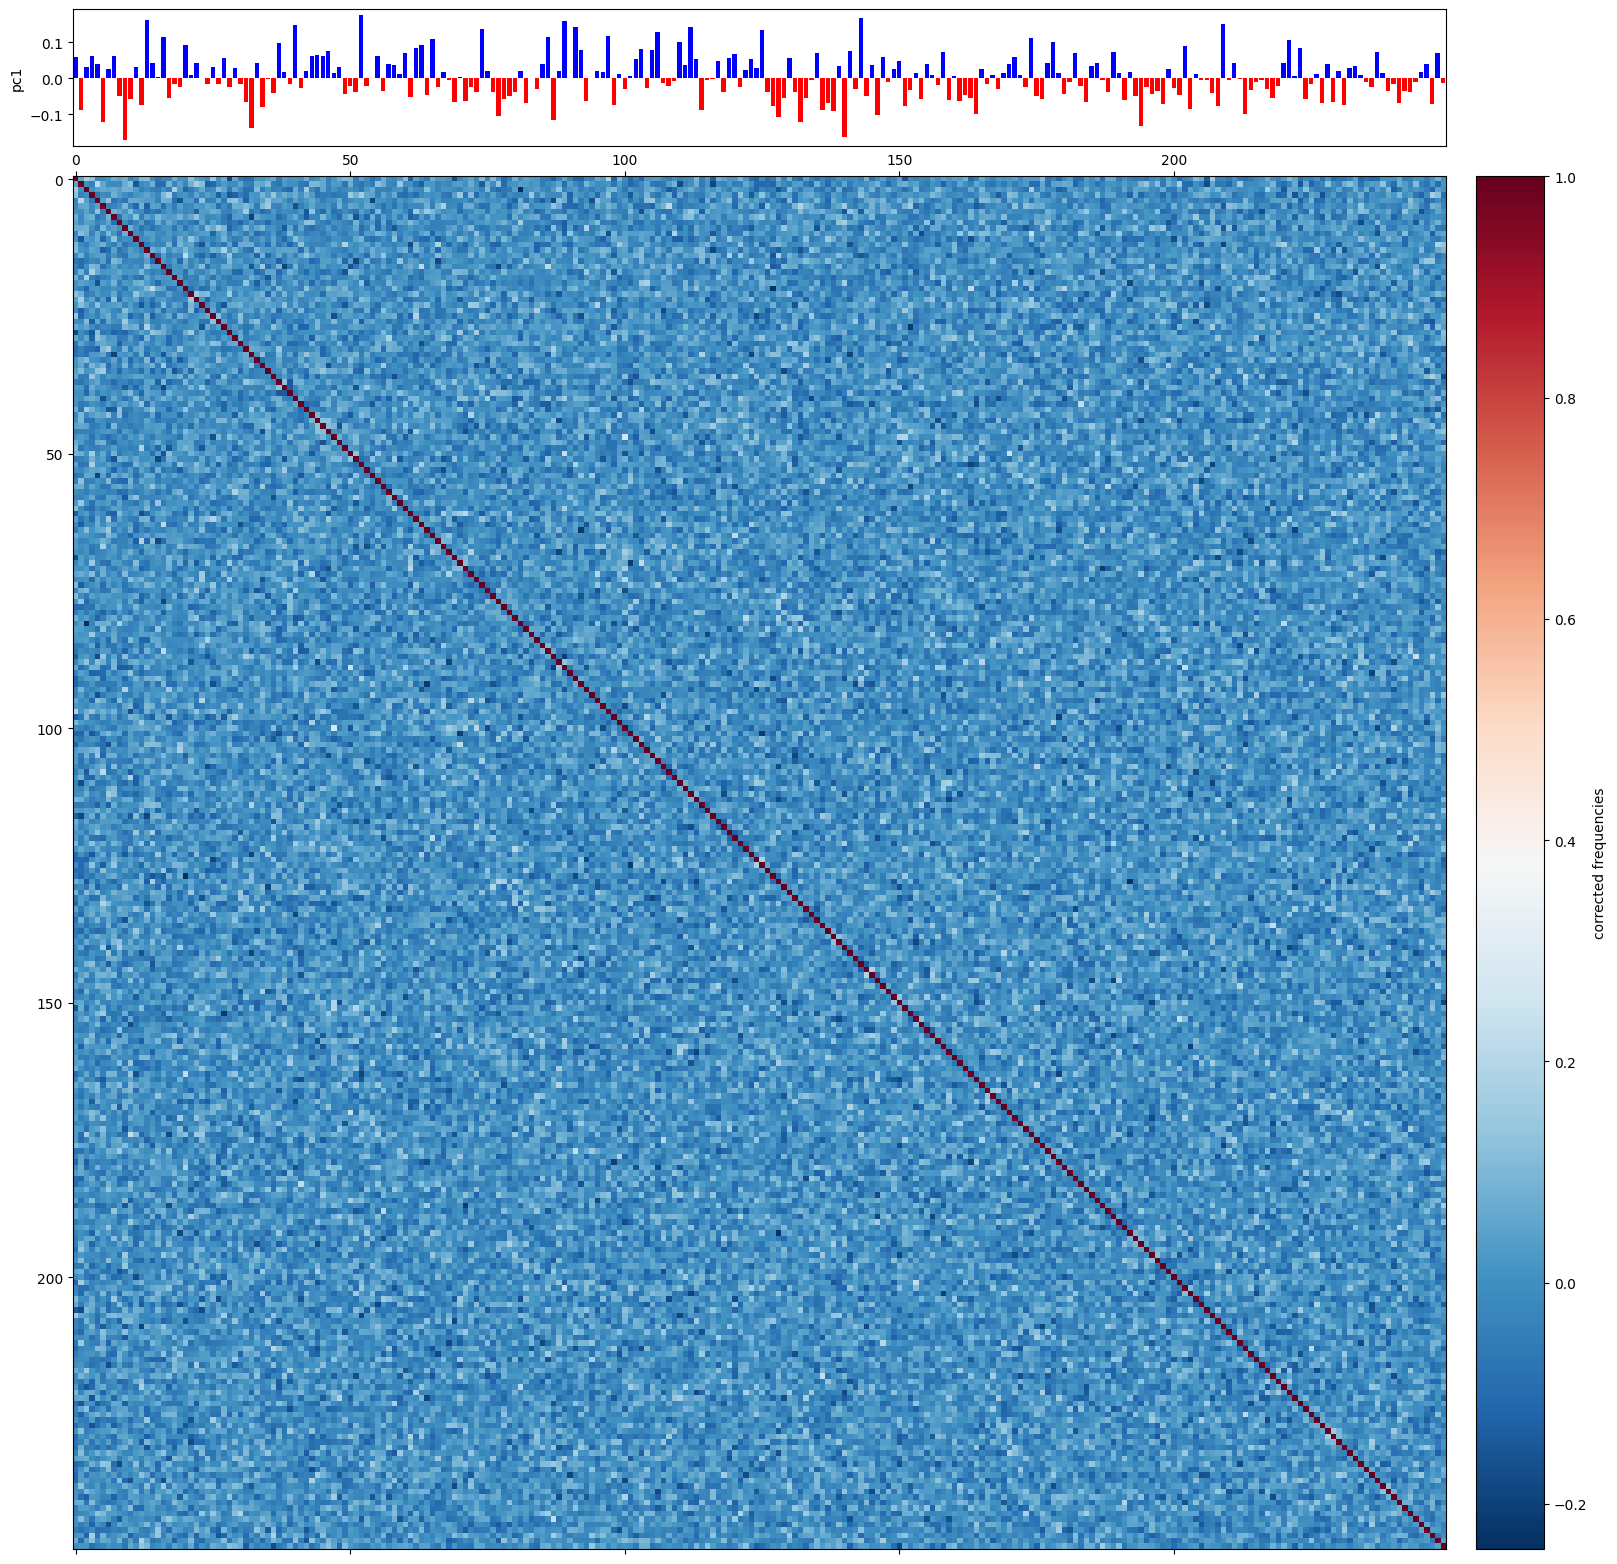

In [12]:
f, ax = plt.subplots(
    figsize=(20, 20),
)
im = ax.matshow(
    pearson_np,
    cmap='RdBu_r',
)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.3)
plt.colorbar(im, cax=cax, label='corrected frequencies')

#### Settings for pc1_np
ax1 = divider.append_axes("top", size="10%", pad=0.3, sharex=ax)
pc1_x_axis = [i for i in range(0, len(pc1_np))]
pc1_bar_color = ['b' if i > 0 else 'r' for i in pc1_np]
ax1.bar(x=pc1_x_axis, height=pc1_np, color=pc1_bar_color)
ax1.set_ylabel('pc1')
ax1.xaxis.set_visible(False)

In [13]:
del f, im, ax, ax1

In [14]:
pearson_np = paptools.read_pearson(
    pearson=f"{data_store}/data/rao_2014/juicer_outputs/gm12878/1000000/pearsons/pearson_chr1.txt"
)

Vh, explained_variances, total_entry_num, valid_entry_num = paptools.pca_on_pearson(pearson_np=pearson_np)
pc1_np = Vh[0]
print(f"Length of pc1_np: {len(pc1_np)}")
print(f"pc1_np: {pc1_np}")
print(f"pc1 explained_variance: {explained_variances[0]}")

Length of pc1_np: 250
pc1_np: [-0.02408  0.07592  0.04868 ... -0.0633  -0.08301 -0.06244]
pc1 explained_variance: 0.8449300048084089


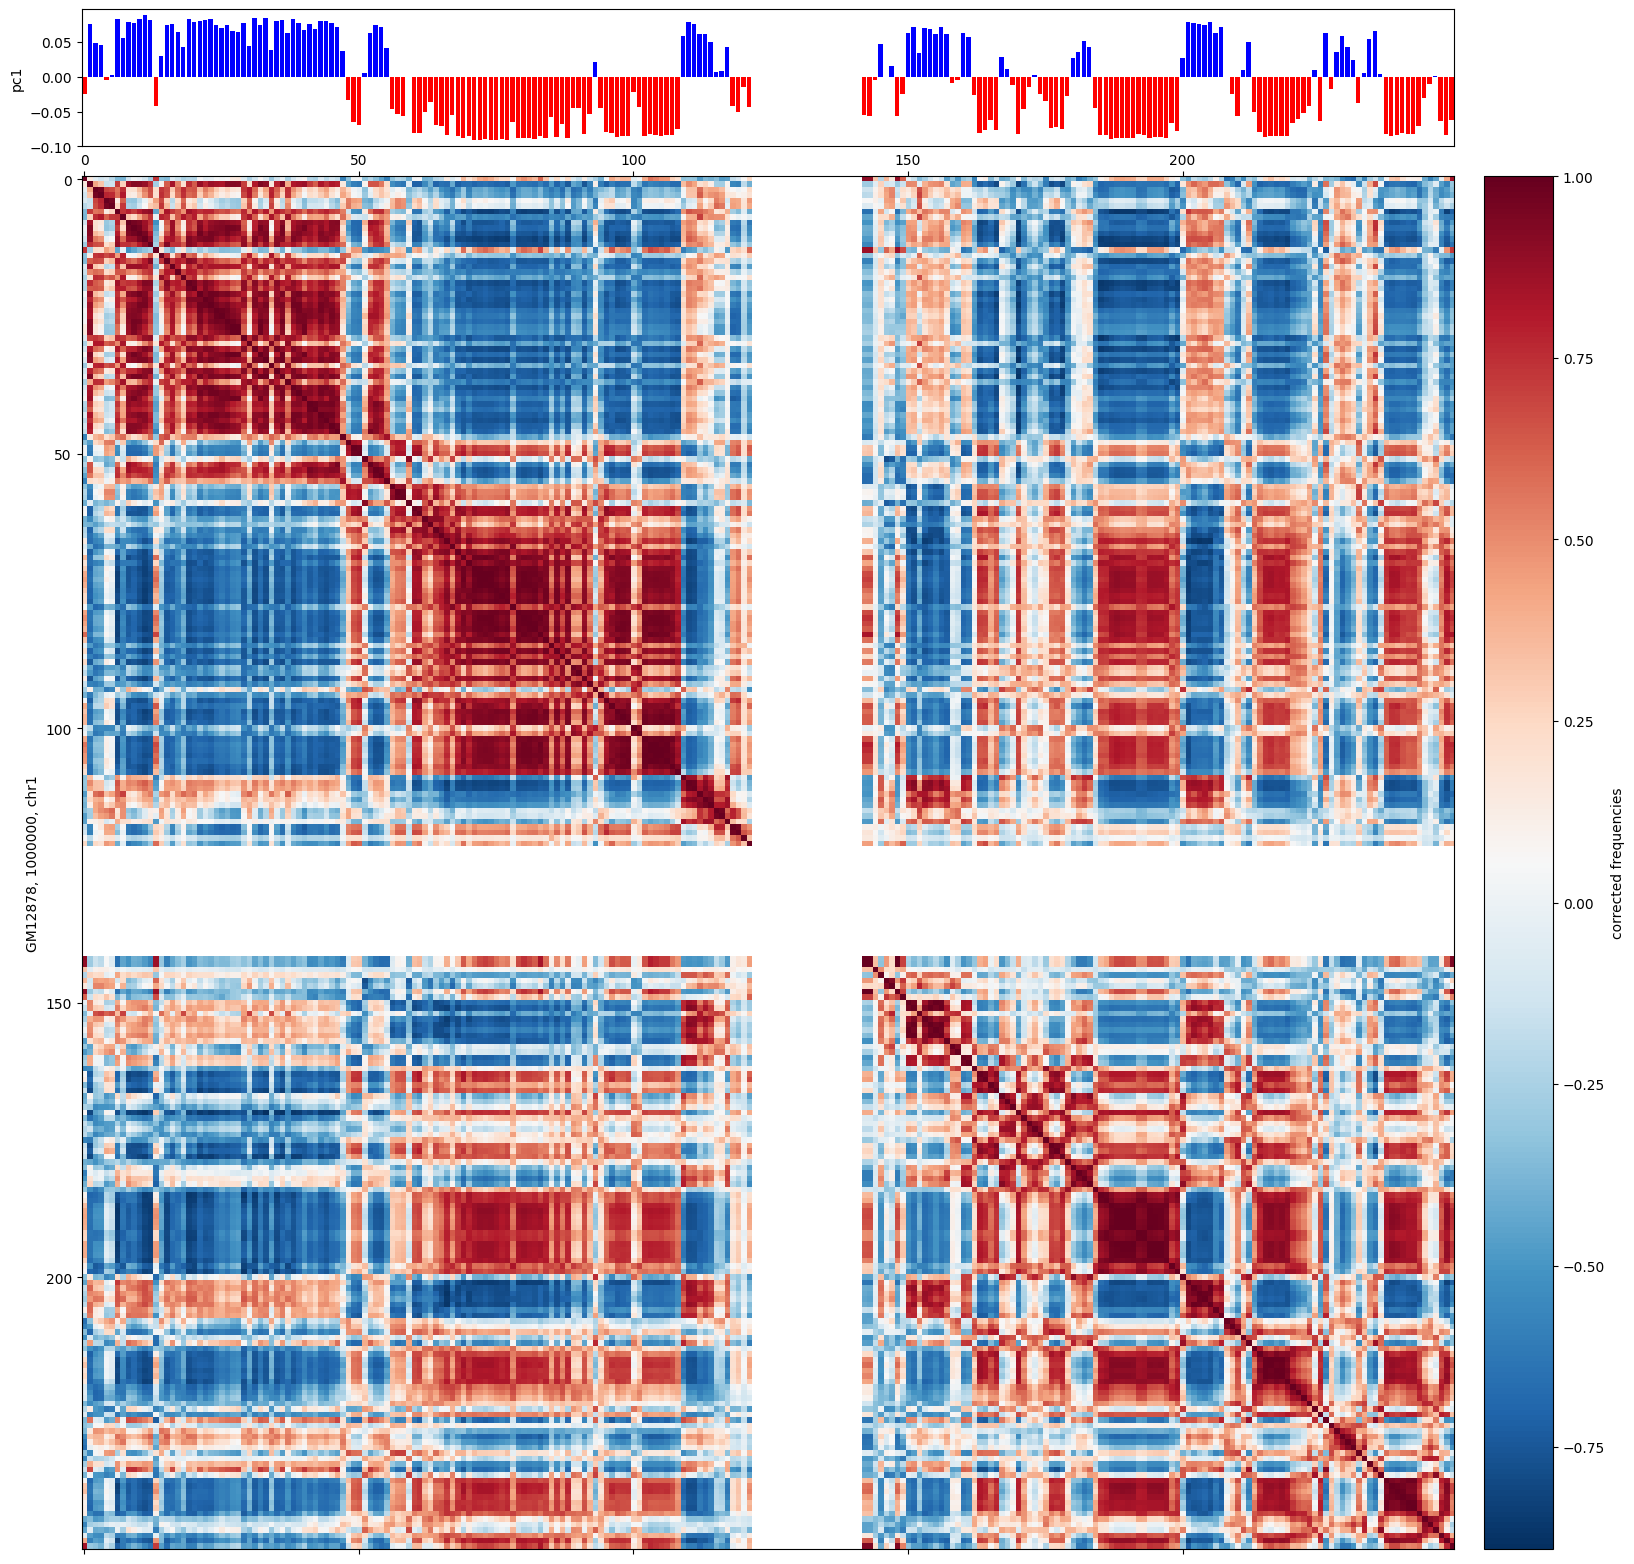

In [15]:
# Settings for pearson_np
f, ax = plt.subplots(
    figsize=(20, 20),
)

im = ax.matshow(
    pearson_np,
    cmap='RdBu_r',
)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.3)
plt.colorbar(im, cax=cax, label='corrected frequencies')
ax.set_ylabel(f'GM12878, 1000000, chr1')

#### Settings for pc1_np
ax1 = divider.append_axes("top", size="10%", pad=0.3, sharex=ax)
pc1_x_axis = [i for i in range(0, len(pc1_np))]
pc1_bar_color = ['b' if i > 0 else 'r' for i in pc1_np]
ax1.bar(x=pc1_x_axis, height=pc1_np, color=pc1_bar_color)
ax1.set_ylabel('pc1')
ax1.xaxis.set_visible(False)